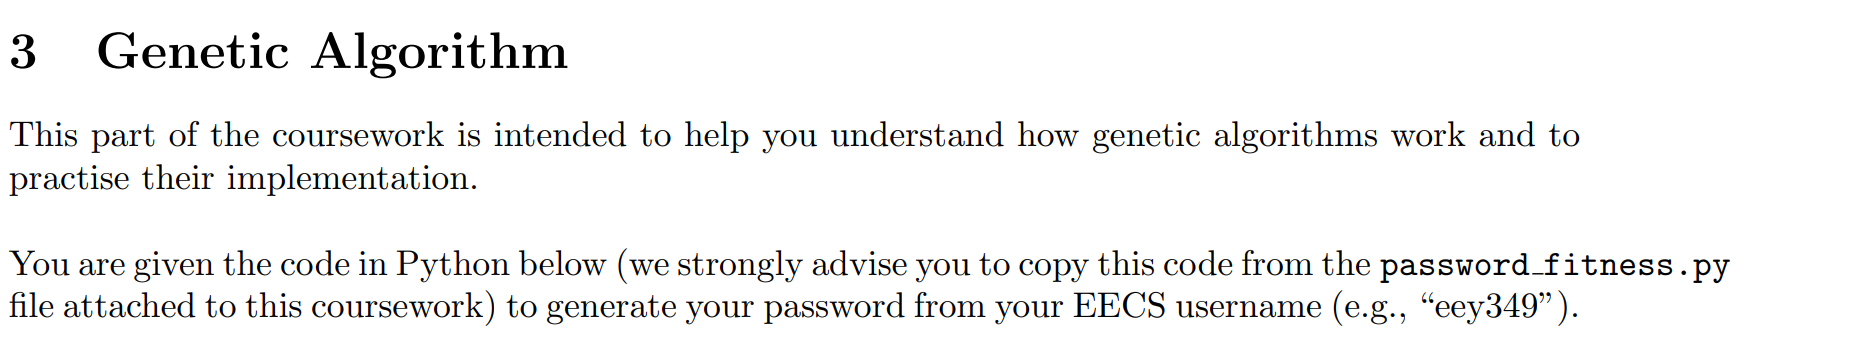

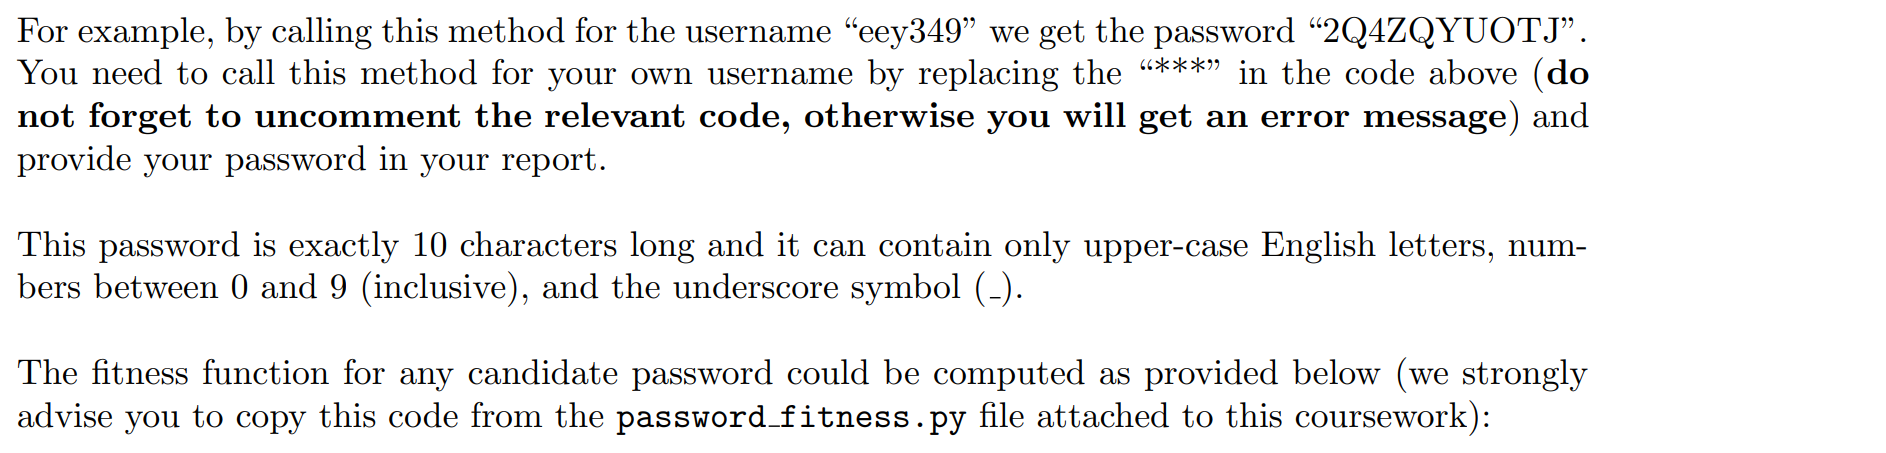

In [271]:
import math
import hashlib
import string

def get_password(student_username, l=10):
    # Possible characters include upper-case English letters, numbers between 0 and 9 (inclusive), 
    # and the underscore symbol
    options = string.digits + string.ascii_uppercase  + "_"

    h = hashlib.sha256(("ECS759P-AI"+student_username).encode("utf-8"))
    d = h.digest()
    s = ""
    for n in d:
      s += options[n%len(options)]

    return s[0:l]

# TO DO: replace *** with your EECS username and uncomment the code
student_password = get_password('ec23752')
print(student_password)

# Distance function
def distance_function(string_one, string_two):
    score = 0
    for i, j in zip(string_one, string_two):
        # Square of the absolute difference between two Unicode codes
        score += math.sqrt(abs(ord(i) - ord(j)))
    return score


# Upper bound of the distance value
MAX_VALUE = distance_function('0000000000', '__________')

# Compute normalised fitness for a list of candidate passwords 
def get_normalised_fitness(list_of_phrases, student_password):
    ordered_dict = dict()
    phrase_to_find = student_password
    for phrase in list_of_phrases:
        # Return 1 when a candidate matches the true password (string distance between them is zero)
        ordered_dict[phrase] = 1 - distance_function(phrase, phrase_to_find) / MAX_VALUE
    return ordered_dict

# Example of how to get fitness values for a list of candidates
get_normalised_fitness(['2Q4HHHHOTJ', '2HHZQYUOTJ'], student_password)

RBPI951WUT


{'2Q4HHHHOTJ': 0.47722338850461055, '2HHZQYUOTJ': 0.4318914343957473}

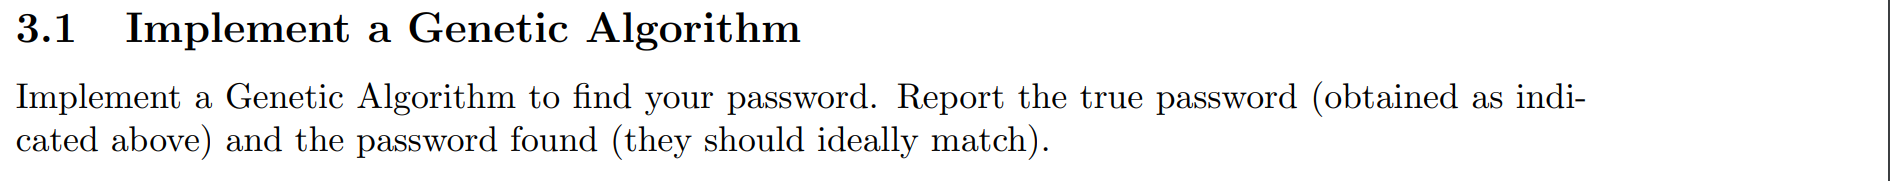

In [272]:
import random, copy
# from random import choices, randrange, random

class Genome:
    
    def __init__(self, length, child_pass=None):
        
        self.options = string.ascii_uppercase + string.digits + '_'
        
        if child_pass == None:
            
            
            self.password = ''.join(self.generate_char() for _ in range(length))
    
        else:
            
            self.password = child_pass
            
    def generate_char(self):
        
        return random.choice(self.options)
    
    
    def mutation(self, probability):
        
        old_pass = self.password
                                        
        for index in range(len(self.password)):
            
            if random.random() <= probability:

                new_char = self.generate_char()
                self.password = self.password[:index] + new_char + self.password[index + 1:]
                
        if old_pass == self.password:

            print("Alert mutation generate the same answer ")


    def chaneg_password(self, given_password):
        self.password = given_password
                
        
    def __str__(self):
        return self.password

In [273]:
def crossover(genome_a, genome_b):

    if len(genome_b.password) == len(genome_a.password) and len(genome_a.password) > 2 :

        random_number = random.randrange(1, len(genome_a.password)-1)

        password_a = genome_a.password[0:random_number] + genome_b.password[random_number:]
        password_b = genome_b.password[0:random_number] + genome_a.password[random_number:]

        children = {password_a, password_b}
        parents = {genome_b.password, genome_a.password}
        
        
        
        if children.isdisjoint(parents) == False:
            print("Alert crossover generate the same answer")
            print(random_number, children, parents, children.intersection(parents))
            
            
        return Genome(10,password_a), Genome(10, password_b)

    return None

In [274]:
def crossing_over(pool_to_cross, pCO):

  for index, genome_a in enumerate(pool_to_cross):
    # TO DO
    # If crossing over should be applied on this individual for the given crossover rate
    if random.random() <= pCO:
      # We get the list of all the other selected individuals
      others = pool_to_cross[:]
      others.remove(genome_a)
      # We pick randomly one of them
      genome_b = random.choice(others)
      # We get its index in order to modify it directly
      genome_b_index = pool_to_cross.index(genome_b)
    
      c_a, c_b = crossover(genome_a, genome_b)
        
      
      all_other_passwords=[gene.password for gene in others]
        
      if c_a.password not in all_other_passwords and c_b.password not in all_other_passwords:
        
        pool_to_cross [index] = c_a
        pool_to_cross [genome_b_index] = c_b

  return pool_to_cross

In [275]:
def create_population(number):
    
    population = []
    
    for i in range(number):
        
        population.append(Genome(10))
        
    return population



def select_best_parents(population, population_fitnesses, target_password = student_password, pair_numbers=2):
    ##changed check if it is needed for finding fiteness again or not
    return choices(population, population_fitnesses, k= pair_numbers)


def sort_population(population, target_password = student_password):
    
    passwords = []
    
    for genome in population:
        
        passwords.append(genome.password)
    
    passwords_weights = get_normalised_fitness(passwords, target_password)
    
    
    combined_list = list(zip(population, list(passwords_weights.values())))

    sorted_list = sorted(combined_list, key=lambda x: x[1], reverse=True)

    sorted_genes = []
    sorted_fitnesses = []
    
    print("\n\nGENERATION\n")
   
    
    for gene, fitness in sorted_list:
        
        sorted_genes.append(gene)
        sorted_fitnesses.append(fitness)
        print(gene, fitness)
    
    print("\n{} genomes\n".format(len(sorted_genes)))
    
    return sorted_genes, sorted_fitnesses

In [276]:
# def run_evolution2(population_size, fitness_limit: int = 1, generation_limit: int = 200):
    
#     population = create_population(population_size)
    
#     for i in range(generation_limit):
        
#         population, population_fitnesses = sort_population(population)
        
        

#         if population_fitnesses[0] == fitness_limit:
#             print("answer has been found!")
            
#             break

#         next_generation = population[0:2]

#         for j in range(int(len(population) / 2) - 1):
            
#             parents = select_best_parents(population,population_fitnesses, pair_numbers=2)
            
#             offspring_a, offspring_b = parents[0].crossover(parents[1])
            
#             offspring_a.mutation(1, 1)
#             offspring_b.mutation(1, 1)
#             next_generation += [offspring_a, offspring_b]

#         population = next_generation

#     return population, i

In [277]:
# run_evolution2(population_size = 20)

In [278]:
def run_evolution(population_size, fitness_limit: int = 1, generation_limit: int = 400):
    
    population = create_population(population_size)
    population, population_fitnesses = sort_population(population)
    half = int(population_size / 2)
    pMuta = 0.2
    # Crossover rate
    pCO = 0.8

    
    for i in range(generation_limit):
        
          mating_pool = copy.deepcopy(population)[:half]
          # perform cross over and mutation over the best parents
          mating_pool = crossing_over(mating_pool, pCO)

          for gene in mating_pool:

                gene.mutation(pMuta)

          # combine the best of parents and offsprings to form a new population
          population = copy.deepcopy(population)[:half] + mating_pool
          population, population_fitnesses = sort_population(population)


    population, population_fitnesses = sort_population(population)


In [279]:
run_evolution(population_size = 20)



GENERATION

AJVS9R8RWS 0.6317711541373361
ROCH6JXO7D 0.5175314148744594
P9WY3TGCZL 0.5142073552805353
PB8DKHWP7O 0.5088104421025773
WNMMXHZSEN 0.5009740180785679
TB052D6K58 0.4936958334166126
SLZAJWM9XN 0.48863659626276956
70U34J2BNF 0.4872275958835106
VMWRZLJTS0 0.4800053865151359
C0FWJC3C9W 0.4778875668905861
P1FEOHCMM0 0.47514483851837874
P1N6Y__R_V 0.4596735398133338
I13J8_SBRD 0.4583363414143161
3O3ZHMGNZU 0.44016968652566013
1RAC3ZURGL 0.42521257568424187
4SARDNQLT1 0.40662853467267945
8A716_NHID 0.4029302428506091
5XKUVE57K6 0.39528353063444555
N4G6BGY52_ 0.39128484093072957
21BQGXD4ME 0.37301142984095015

20 genomes

Alert mutation generate the same answer 


GENERATION

PB8DKH1PYV 0.6614361883374479
AJVS9R8RWS 0.6317711541373361
SLZAJE6RZL 0.5943097960868803
ROCDJF3C9W 0.5536052133527324
VBVSXHZSEN 0.5275280541752576
P9W93LQBPO 0.5183997158046738
ROCH6JXO7D 0.5175314148744594
P9WY3TGCZL 0.5142073552805353
PB052DWTS0 0.5132103534636099
PB8DKHWP7O 0.5088104421025773
WNMMXHZSEN

PBVY92DXYV 0.7320625426846274
WBMS9L1MYR 0.7301101022503546
PBVY92DTYS 0.7274264099778078
PBHG26DTYV 0.7256604953093845
0BCA922TYS 0.7122224928157974
PEVYS24ZZV 0.6566161955195302
PBVS9G1ZHV 0.6429285365865938
WBMS9L1ZZV 0.6254482154885701
PBVS321M72 0.6174272574126494
6BVY92YZZD 0.5949953885328119
7BKS22D5YV 0.5831708823531502

19 genomes

Alert crossover generate the same answer
1 {'PEVS921ZZW', 'PBVY821ZDV'} {'PEVS921ZZW', 'PBVY821ZDV'} {'PEVS921ZZW', 'PBVY821ZDV'}
Alert crossover generate the same answer
1 {'P7VSVB1ZZV', 'PEVS921ZZW'} {'P7VSVB1ZZV', 'PEVS921ZZW'} {'PEVS921ZZW', 'P7VSVB1ZZV'}
Alert mutation generate the same answer 


GENERATION

PBVY921OVV 0.7835597668678289
PBVY921ZZV 0.7815221545833024
PBVS921ZHV 0.7737656238196102
PBCS921ZZW 0.7722425675106434
PEVS921ZZV 0.7684770331490204
KBCS921ZZV 0.7589148758932409
PJVS921ZZV 0.7524847409306643
PBVY821ZDV 0.7394103823836209
PBVS9G1ZHV 0.7371449066760782
P7VY921ZZV 0.7331442098986127
PBVY92DXYV 0.7320625426846274
WBMS9L1MYR 0


PBTI921WVV 0.8897190950682843
SBRH921WVV 0.8897190950682843
PBUI921WVV 0.8862756897151911
MBUI921WVV 0.8742877109876949
PAKI921WVV 0.8716891905654016
PBOD911WVV 0.8677807498978183
PBTL921WVV 0.8644545374362888
PBTL981WVV 0.8644545374362888
PBRD911WVV 0.861738824122432
FBSL921WVV 0.8384622877650568
P3UI921WVV 0.8297824214285879
PAKIE21WWV 0.8151181495260241
XBT7921WVR 0.8127327651674078
XBUX911WVV 0.8107729256356556
PBUIU81WVV 0.8090911912163952
PBUX9M1WVV 0.7835880189595339
MBR0991WVH 0.7795340629598453
SBRP92WWVV 0.7757961253554186
8BTL58MWCP 0.6485052727631676
80TL58MJCW 0.5379360680411456

20 genomes

Alert crossover generate the same answer
1 {'PBRD911WVV', 'PBTI921WVV'} {'PBRD911WVV', 'PBTI921WVV'} {'PBRD911WVV', 'PBTI921WVV'}
Alert crossover generate the same answer
5 {'PBUI921WVV', 'PBTI921WVV'} {'PBUI921WVV', 'PBTI921WVV'} {'PBUI921WVV', 'PBTI921WVV'}
Alert crossover generate the same answer
4 {'PAKI921WVV', 'SBRH921WVV'} {'PAKI921WVV', 'SBRH921WVV'} {'PAKI921WVV', 'SBRH921WVV

MBUI921WVV 0.8742877109876949
PAKI921WVV 0.8716891905654016
PBOD921WVV 0.8716891905654016
MUUI9211T6 0.8716891905654016
PBOD911WVV 0.8677807498978183
PBTL981WVV 0.8644545374362888
SBRH9C1WVV 0.8604059704092983
PBOD911WVV 0.8568691135713394
SEUH921WVV 0.8524665587087925
PCKI921WVV 0.8037619900144877
PBUI921WVV 0.7829050845328623
PBOD921W5V 0.733342562262663
PCNI9CIWVV 0.6615242943719433

18 genomes

Alert crossover generate the same answer
7 {'PBTI921WVV', 'PBOD921WVV'} {'PBTI921WVV', 'PBOD921WVV'} {'PBTI921WVV', 'PBOD921WVV'}
Alert crossover generate the same answer
2 {'PBUI921WVV', 'PBTI921WVV'} {'PBUI921WVV', 'PBTI921WVV'} {'PBUI921WVV', 'PBTI921WVV'}
Alert crossover generate the same answer
7 {'PBUI981WVV', 'PBOD911WVV'} {'PBUI981WVV', 'PBOD911WVV'} {'PBUI981WVV', 'PBOD911WVV'}
Alert crossover generate the same answer
7 {'PAKI921WVV', 'PBRH921WVV'} {'PAKI921WVV', 'PBRH921WVV'} {'PAKI921WVV', 'PBRH921WVV'}
Alert crossover generate the same answer
6 {'PAKI921WVV', 'PBOD921WVV'} {'PAKI


UBTI951WUV 0.9249340191432497
UBTI921WUT 0.92029788643643
ZBRI951WUV 0.9174863002992966
PBTI951WVV 0.9149836527002799
HBTI951WUV 0.904072016373801
UBRIF51WUT 0.9015146468287508
YBFI951WUV 0.8946527654239819
ZBRI921WUV 0.8922217426673009
PBTI921WVV 0.8897190950682843
UBRI921YUV 0.8875856099604813
MBRI921WVV 0.8862756897151911
PBTI521WUX 0.8665880225440918
UBRIO53WUV 0.8444334220996533
ZBTIR51WVV 0.8214227320261568
YBUJ928WVV 0.8151331169917816
MBFI921BUV 0.808520316910393
PBRJV510UV 0.7538848661998643
USTI93ZYUV 0.7301363263450233
0BTZY51WVV 0.707903526365564
ZBTW92XLUV 0.6896288843231516

20 genomes

Alert crossover generate the same answer
6 {'HBTI951WUV', 'UBTI951WUV'} {'HBTI951WUV', 'UBTI951WUV'} {'HBTI951WUV', 'UBTI951WUV'}
Alert crossover generate the same answer
7 {'PBTI951WVV', 'UBTI921WVV'} {'PBTI951WVV', 'UBTI921WVV'} {'PBTI951WVV', 'UBTI921WVV'}
Alert mutation generate the same answer 
Alert mutation generate the same answer 


GENERATION

PBTI951WUV 0.9295701518500694
UBRI9

Alert crossover generate the same answer
7 {'UBTI951WUV', 'RBTI921WUV'} {'UBTI951WUV', 'RBTI921WUV'} {'UBTI951WUV', 'RBTI921WUV'}
Alert mutation generate the same answer 


GENERATION

RBTI951WUT 0.9708270017004211
RBTI951WUV 0.9501985767752452
RBTI951WUY 0.938210598047749
ZBRI951WUT 0.9381147252244724
PBRI921WUT 0.9334785925176527
PBTI951WUV 0.9295701518500694
TBLI951WUV 0.9295701518500694
TBLI971WUT 0.9295701518500694
UBRI921WUT 0.928842459810833
UBTI951WUV 0.9249340191432497
PBLI991WUT 0.9210255784756664
UBTI921WUT 0.92029788643643
EBRI921WUT 0.9015146468287508
UBTI951WUH 0.8950333288044344
WB9I951EUT 0.8355439291344658
RGTI920W4V 0.7939380581811488
UCTIX511UT 0.7598445351607308
P_LO991W_V 0.7399904112177779
P4O6928WV2 0.6831298370122718
PBT_15QW6Y 0.6441806879340463

20 genomes

Alert crossover generate the same answer
7 {'RBTI951WUY', 'RBTI951WUT'} {'RBTI951WUY', 'RBTI951WUT'} {'RBTI951WUY', 'RBTI951WUT'}
Alert crossover generate the same answer
7 {'UBTI951WUV', 'PBTI951WUV'} {'UB

Alert crossover generate the same answer
3 {'RBLI951WUT', 'RDTI951WUT'} {'RBLI951WUT', 'RDTI951WUT'} {'RBLI951WUT', 'RDTI951WUT'}
Alert crossover generate the same answer
5 {'PBTI951WUT', 'RDTI951WUT'} {'PBTI951WUT', 'RDTI951WUT'} {'PBTI951WUT', 'RDTI951WUT'}
Alert crossover generate the same answer
4 {'RDTI951WUT', 'RBRI951WUT'} {'RDTI951WUT', 'RBRI951WUT'} {'RDTI951WUT', 'RBRI951WUT'}
Alert crossover generate the same answer
6 {'RDTI951WUT', 'RBTI951WUT'} {'RDTI951WUT', 'RBTI951WUT'} {'RDTI951WUT', 'RBTI951WUT'}


GENERATION

RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
PBRI951WUT 0.9587431501496483
PMRI95PSUT 0.9562405025506316
RBTI951WUV 0.9562405025506316
RBLI951VUT 0.9501985767752452
RDTI951WUT 0.9501985767752452
PMRI95HSUY 0.9249340191432497
PBSIV61WUV 0.9235282260746829
RBLI95_5U1 0.9116063275258472
ODTI951WUT 0.8978945059514738
RRRT9A1WMT 0.8950333288044344
RDTI951WUT 0.8857738268437969
RBLI9515UT 0.8403413914871197
PBRI951WUT 0.7999780170207316
RBTI951WVT 0.780

Alert crossover generate the same answer
2 {'RBLI951WUT', 'RBTI951WUM'} {'RBLI951WUT', 'RBTI951WUM'} {'RBLI951WUT', 'RBTI951WUM'}
Alert crossover generate the same answer
1 {'RBTI951WUT', 'RBTI951VUT'} {'RBTI951WUT', 'RBTI951VUT'} {'RBTI951WUT', 'RBTI951VUT'}
Alert crossover generate the same answer
4 {'RBLI951WUV', 'RBUI951WUV'} {'RBLI951WUV', 'RBUI951WUV'} {'RBLI951WUV', 'RBUI951WUV'}
Alert crossover generate the same answer
2 {'RBPI951HUT', 'RBLI951WUV'} {'RBPI951HUT', 'RBLI951WUV'} {'RBPI951HUT', 'RBLI951WUV'}
Alert crossover generate the same answer
2 {'RBPI951HUT', 'RBTM951WUT'} {'RBPI951HUT', 'RBTM951WUT'} {'RBPI951HUT', 'RBTM951WUT'}


GENERATION

RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
PBRI951WUT 0.9587431501496483
RBLI951VUT 0.9562405025506316
RBTI951WUV 0.9501985767752452
RDTI951WUT 0.9501985767752452
RBUI951WUV 0.946755171422152
RBPI951HUT 0.9435067317133968
RBTM951WUT 0.9416540034008422
RBTI951WQT 0.9416540034008422
RBTI951WUM 0.932234752451023
PBRV951W

8 {'RBRI951VUT', 'RDPI951WUT'} {'RBRI951VUT', 'RDPI951WUT'} {'RBRI951VUT', 'RDPI951WUT'}
Alert crossover generate the same answer
2 {'RBRI951VUT', 'RBPI951WUT'} {'RBRI951VUT', 'RBPI951WUT'} {'RBRI951VUT', 'RBPI951WUT'}


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
RBRI951VUT 0.9647850759250347
RBPI981VUT 0.960148943218215
RBPI951WUT 0.9587431501496483
RBPI951WXZ 0.9527970971975385
PBRI951WUT 0.9390059623174796
RD1I951ULT 0.9163894457688466
RBKI851WUT 0.9008208731940806
RBLI9513UT 0.8862343740442912
RBTF951WUX 0.8833080068016843
R3PIK81WUT 0.860439813256194
RBRI95NVUT 0.8563568993058737
RBYH951WU5 0.848479930689431
PBPI951W8T 0.8337694625556318

19 genomes

Alert crossover generate the same answer
2 {'PBPI951WUT', 'RBPI951WUT'} {'PBPI951WUT', 'RBPI951WUT'} {'PBPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
6 {'RBLI951WUT', 'RDPI951WUT'} 

PLPI951WUT 0.8296513269157376
0BP105SWU9 0.8128413310948497
RBLI951WUT 0.8069349899664039
RBOI851WUT 0.6388815198403469

18 genomes

Alert crossover generate the same answer
1 {'RBPD951WUT', 'RBPI951WUT'} {'RBPD951WUT', 'RBPI951WUT'} {'RBPD951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
6 {'RBTI951WUT', 'RDPI951WUT'} {'RDPI951WUT', 'RBTI951WUT'} {'RBTI951WUT', 'RDPI951WUT'}
Alert crossover generate the same answer
1 {'RBPD951WUT', 'RBTI951WUT'} {'RBPD951WUT', 'RBTI951WUT'} {'RBPD951WUT', 'RBTI951WUT'}
Alert crossover generate the same answer
8 {'RBPD951WUT', 'RBP79515UT'} {'RBPD951WUT', 'RBP79515UT'} {'RBPD951WUT', 'RBP79515UT'}
Alert mutation generate the same answer 


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
RBPI951WUT 0.9673835963473278
RBRI951VUT 0.9647850759250347
5BPI8T1WUH 0.9436420950242993
RDDI9KHVUT 0.9300456075626655
RBP7951

3 {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
4 {'RBTI951WUT', 'RBPI951WUT'} {'RBTI951WUT', 'RBPI951WUT'} {'RBTI951WUT', 'RBPI951WUT'}
Alert mutation generate the same answer 
Alert mutation generate the same answer 


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
RBPI851TUT 0.960148943218215
QBPI951TUT 0.960148943218215
RDPI951ZUT 0.9541070174428286
RBPI8N1TUT 0.9381147252244724
RDPI951WUT 0.9210255784756664
RBPI951WUT 0.9030617541514442
RBWHB51WUT 0.8942288809867348
FJTIR51WAT 0.8872164474692678
RFNI951WUX 0.8783911172996162
Q5WI951WUT 0.8350403388377087
PY6I951WUT 0.7408757335317867

18 genomes

Alert crossover generate the same answer
2 {'QBPI951WUT', 'RDPI951WUT'} {'QBPI951WUT', 'RDPI951WUT'} {'QBPI951WUT', 'RDPI951WUT'}
Alert crossover gen

Alert crossover generate the same answer
1 {'RBLI951WUT', 'RDPI951WUT'} {'RBLI951WUT', 'RDPI951WUT'} {'RBLI951WUT', 'RDPI951WUT'}
Alert crossover generate the same answer
5 {'SBPI951WUT', 'QBTI951WUT'} {'SBPI951WUT', 'QBTI951WUT'} {'SBPI951WUT', 'QBTI951WUT'}


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
SBPI951WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
RBPI451WUT 0.9673835963473278
QBPI911WUT 0.9562405025506316
RBPI916WUT 0.938210598047749
SBPN951WUR 0.9321686722723626
RDAI951WUT 0.9228783067882209
PBPI951WUD 0.9210255784756664
RNPI951RUT 0.9168544810833368
ZBPI8A1WUT 0.8936275357358676
QSPI951DUT 0.8616907484136722
R2LI951WU2 0.8274278302446391
RBPI4UOWUT 0.8049763504529283
QBTI9N1W0D 0.7362357997259604

20 genomes

Alert crossover generate the same answer
8 {'QBPI911WUT', 'RBPI951WUT'} {'RBPI951WUT', 'QBPI911WUT'} {'QBPI911WUT', 'RBPI951WUT'}

PBPIP53WUT 0.8887887577123138
SBEI9U1WST 0.8338934315396416
0BXP95FWUT 0.7682539895653069
RBTIR5HAUT 0.7595233680213158

20 genomes

Alert crossover generate the same answer
4 {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
6 {'RBPI951WUT', 'RBPI851WUT'} {'RBPI851WUT', 'RBPI951WUT'} {'RBPI951WUT', 'RBPI851WUT'}
Alert crossover generate the same answer
4 {'SBPI951WUT', 'RBPI951WUT'} {'SBPI951WUT', 'RBPI951WUT'} {'SBPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
4 {'QBPI951WUT', 'PBPI951WUT'} {'QBPI951WUT', 'PBPI951WUT'} {'QBPI951WUT', 'PBPI951WUT'}
Alert crossover generate the same answer
6 {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'}


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
SBPI951WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBTI951WUT 0.9708270017004211
RBLI951W

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
SBPI951WUT 0.9854135008502105
RAPI951WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBPI931WUT 0.9793715750748241
RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
RCPI851WUT 0.9708270017004211
GAPI951WUT 0.9370355561655209
PLPI951WUT 0.9332450146733798
Q1PI951WUT 0.9252718241476464
RBTI951WIT 0.92029788643643
RDPI951WUC 0.91922989837226
SBPI957WU1 0.8633891280734166
RBLI9N1WUK 0.8541350085021054
RCPI8A1WQA 0.8275438124028769
REPI2EOJUA 0.6817302039777006

20 genomes

Alert crossover generate the same answer
5 {'RAPI951WUT', 'RBPI951WUT'} {'RBPI951WUT', 'RAPI951WUT'} {'RAPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
8 {'PBPI951WUT', 'RBPI851WUT'} {'PBPI951WUT', 'RBPI851WUT'} {'PBPI951WUT', 'RBPI851WUT'}
Alert crossover generate the same answer
6 {'QBPI951WUT', 'RBPI851WUT'} {'QBPI951WUT', 'RBPI851WUT'} {'QBPI951WUT', 'RBPI851WUT'}
Alert crossover 

SBPI951WUT 0.9854135008502105
RAPI951WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBPI931WUT 0.9793715750748241
RBTI951WUT 0.9708270017004211
RBLI951WUT 0.9708270017004211
QBPI951WUT 0.9647850759250347
RDPV9518UT 0.9541070174428286
_CPI9N1WUS 0.91922989837226
RBPH9O1WUT 0.9110366570504296
RSNI831WUT 0.8840149742972947
P1PI951WUT 0.8455650143160982
SBPI951UUT 0.8453021353373961
RBPL931WUT 0.799839460117591

18 genomes

Alert crossover generate the same answer
1 {'QBPI951WUT', 'RBPI951WUT'} {'QBPI951WUT', 'RBPI951WUT'} {'QBPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
7 {'RDPI951WUT', 'RBPI851WUT'} {'RDPI951WUT', 'RBPI851WUT'} {'RDPI951WUT', 'RBPI851WUT'}
Alert crossover generate the same answer
5 {'SBPI951WUT', 'RAPI951WUT'} {'SBPI951WUT', 'RAPI951WUT'} {'SBPI951WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
2 {'QBPI951WUT', 'RDPI951WUT'} {'QBPI951WUT', 'RDPI951WUT'} {'QBPI951WUT', 'RDPI951WUT'}
Alert crossover gene

6 {'RBPI931WUT', 'RDPI951WUT'} {'RBPI931WUT', 'RDPI951WUT'} {'RBPI931WUT', 'RDPI951WUT'}
Alert crossover generate the same answer
2 {'RBPI941WUT', 'RBPI931WUT'} {'RBPI941WUT', 'RBPI931WUT'} {'RBPI941WUT', 'RBPI931WUT'}
Alert mutation generate the same answer 


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
SBPI951WUT 0.9854135008502105
RAPI951WUT 0.9854135008502105
RBOI951WUT 0.9854135008502105
RBPI941WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBPI931WUT 0.9793715750748241
RBEI951WUT 0.9516220553153103
RBFI941WUT 0.9392869404487663
RBPA854SUT 0.8897190950682843
PBPI9C1PUT 0.8862016435344446
PAPI95HOUT 0.8535738336373485
RDPI9T1KUT 0.8476282696661849
SLPI951WV4 0.8421867415982733
QBP_9TVWUT 0.7470563547361728
3BPIC5FW5T 0.723301813274885

19 genomes

Alert crossover generate the same answer
4 {'RBOI951WUT', 'SBPI951WUT'} {'RBOI951WUT', 'SBPI951WUT'} {'RBOI951WUT', 'SBPI951WUT'}
Alert crossover generate the 



GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
SBPI951WUT 0.9854135008502105
RAPI951WUT 0.9854135008502105
RBOI951WUT 0.9854135008502105
RBPI941WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBPI931WUT 0.9793715750748241
RBPI9E1WUT 0.9416540034008422
RBPV951XUT 0.9328211302361328
PBPI951WHT 0.9267792044607464
SBP4951WUT 0.9185697643718913
MBYI851WUT 0.9090375997481701
RBOL95XRUT 0.8364398815714678
RDPIVO1WUT 0.8264440293942996
X7PIK51WUJ 0.8078807400878136
QBPI9MTW5T 0.7451459483221883

19 genomes

Alert crossover generate the same answer
5 {'RAPI951WUT', 'RBPI951WUT'} {'RBPI951WUT', 'RAPI951WUT'} {'RAPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
8 {'QBPI951WUT', 'RBOI951WUT'} {'RBOI951WUT', 'QBPI951WUT'} {'RBOI951WUT', 'QBPI951WUT'}
Alert crossover generate the same answer
3 {'SBPI951WUT', 'RDPI951WUT'} {'SBPI951WUT', 'RDPI951WUT'} {'SBPI951WUT', 'RDPI951WUT'}
Alert crossover generate the

5 {'RDPI951WUT', 'RAPI951WUT'} {'RDPI951WUT', 'RAPI951WUT'} {'RDPI951WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
6 {'RBPI931WUT', 'RBPI851WUT'} {'RBPI931WUT', 'RBPI851WUT'} {'RBPI931WUT', 'RBPI851WUT'}


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
SBPI951WUT 0.9854135008502105
RAPI951WUT 0.9854135008502105
RBOI951WUT 0.9854135008502105
RBPI941WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBPI931WUT 0.9793715750748241
RBPI051WUT 0.9562405025506316
SBPW951WUT 0.930835818559229
RAUI956WUT 0.9201806935448663
RBPI9512UT 0.9112737895234339
POPI751WUT 0.9061507795355705
RDPI9P1WUT 0.9035779021788375
RBPI931WU3 0.8955785169151849
RGOI9M1WUT 0.8813381370964888
RQPI9X1WUT 0.8572118389871277
QBPC95ZWUT 0.8562848545543752

20 genomes

Alert crossover generate the same answer
6 {'RBPI941WUT', 'RBPI951WUT'} {'RBPI941WUT', 'RBPI951WUT'} {'RBPI941WUT', 'RBPI951WUT'}
Alert crossover generate the same answer

QB4I951PUY 0.8370203494493444
PBPI951WUT 0.816268520798477
SRPIY51WCT 0.7826685297748217
R00Y951YUT 0.7766266039994352

19 genomes

Alert crossover generate the same answer
8 {'QBPI951WUT', 'RBPI851WUT'} {'QBPI951WUT', 'RBPI851WUT'} {'QBPI951WUT', 'RBPI851WUT'}
Alert crossover generate the same answer
5 {'QBPI951WUT', 'PBPI951WUT'} {'QBPI951WUT', 'PBPI951WUT'} {'QBPI951WUT', 'PBPI951WUT'}
Alert crossover generate the same answer
7 {'RBOI951WUT', 'SBPI951WUT'} {'RBOI951WUT', 'SBPI951WUT'} {'RBOI951WUT', 'SBPI951WUT'}
Alert crossover generate the same answer
3 {'PBPI951WUT', 'RAPI951WUT'} {'PBPI951WUT', 'RAPI951WUT'} {'PBPI951WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
3 {'RBOI951WUT', 'RDPI951WUT'} {'RBOI951WUT', 'RDPI951WUT'} {'RBOI951WUT', 'RDPI951WUT'}
Alert crossover generate the same answer
4 {'RBPI941WUT', 'RBPI931WUT'} {'RBPI941WUT', 'RBPI931WUT'} {'RBPI941WUT', 'RBPI931WUT'}
Alert crossover generate the same answer
7 {'PBPI951WUT', 'RBPI951WUT'} {'PBPI951WUT', '

Alert crossover generate the same answer
4 {'RBOI951WUT', 'RBPI951WUT'} {'RBOI951WUT', 'RBPI951WUT'} {'RBOI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
7 {'QBPI951WUT', 'RBOI951WUT'} {'RBOI951WUT', 'QBPI951WUT'} {'RBOI951WUT', 'QBPI951WUT'}
Alert crossover generate the same answer
1 {'PBPI951WUT', 'SBPI951WUT'} {'SBPI951WUT', 'PBPI951WUT'} {'PBPI951WUT', 'SBPI951WUT'}
Alert crossover generate the same answer
3 {'QBPI951WUT', 'RAPI951WUT'} {'QBPI951WUT', 'RAPI951WUT'} {'QBPI951WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
2 {'RBOI951WUT', 'RBPI941WUT'} {'RBOI951WUT', 'RBPI941WUT'} {'RBOI951WUT', 'RBPI941WUT'}
Alert crossover generate the same answer
5 {'PBPI951WUT', 'RAPI951WUT'} {'PBPI951WUT', 'RAPI951WUT'} {'PBPI951WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
2 {'SBPI951WUT', 'RDPI951WUT'} {'SBPI951WUT', 'RDPI951WUT'} {'SBPI951WUT', 'RDPI951WUT'}


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
S

RBOI951WUT 0.9854135008502105
RBPI941WUT 0.9854135008502105
PBPI951WUT 0.9793715750748241
RDPI951WUT 0.9793715750748241
RBPI931WUT 0.9793715750748241
RDPI951WPT 0.946755171422152
RA4I951WUT 0.9082290023514146
RBPI9318UT 0.898157384930176
RBPI901DUS 0.8892160214635643
SBPIM59WUT 0.8789238436945146
RBPI85JWUI 0.8641030604165736
RBOO_51WUT 0.8597668011864286
U1PO951WVP 0.8351047881655471
DB1IN51WUT 0.7973643910860512
9CPI9C1OU6 0.7367529267662338

20 genomes

Alert crossover generate the same answer
3 {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'} {'RDPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
3 {'RBPI941WUT', 'RBPI851WUT'} {'RBPI941WUT', 'RBPI851WUT'} {'RBPI941WUT', 'RBPI851WUT'}
Alert crossover generate the same answer
7 {'QBPI951WUT', 'PBPI951WUT'} {'QBPI951WUT', 'PBPI951WUT'} {'QBPI951WUT', 'PBPI951WUT'}
Alert crossover generate the same answer
6 {'RBOI951WUT', 'RDPI951WUT'} {'RBOI951WUT', 'RDPI951WUT'} {'RBOI951WUT', 'RDPI951WUT'}
Alert crossover gen

SBNI951WUT 0.9647850759250347
RSPI951WUT 0.9398583232974359
RBPI941WUT 0.9261267464969761
RSOI951WUT 0.9252718241476464
QKPI971WUT 0.9210255784756664
PBPI951WUT 0.9023852451739476
RBPI8O2EUT 0.8345648831251125

18 genomes

Alert crossover generate the same answer
4 {'SBPI951WUT', 'RBPI951WUT'} {'SBPI951WUT', 'RBPI951WUT'} {'SBPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
6 {'RBOI951WUT', 'RAPI951WUT'} {'RBOI951WUT', 'RAPI951WUT'} {'RBOI951WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
2 {'RBOI951WUT', 'RBPI931WUT'} {'RBOI951WUT', 'RBPI931WUT'} {'RBOI951WUT', 'RBPI931WUT'}
Alert crossover generate the same answer
8 {'RBPI941WUT', 'RAPI951WUT'} {'RBPI941WUT', 'RAPI951WUT'} {'RBPI941WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
7 {'RDPI951WUT', 'RBPI851WUT'} {'RDPI951WUT', 'RBPI851WUT'} {'RDPI951WUT', 'RBPI851WUT'}


GENERATION

RBPI951WUT 1.0
RBPI851WUT 0.9854135008502105
QBPI951WUT 0.9854135008502105
SBPI951WUT 0.9854135008502105
RAPI951W


17 genomes

Alert crossover generate the same answer
1 {'RBPI951WUT', 'RAPI951WUT'} {'RBPI951WUT', 'RAPI951WUT'} {'RAPI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
5 {'SBPI951WUT', 'RDPI951WUT'} {'SBPI951WUT', 'RDPI951WUT'} {'SBPI951WUT', 'RDPI951WUT'}
Alert crossover generate the same answer
7 {'RDPI951WUT', 'RAPI951WUT'} {'RDPI951WUT', 'RAPI951WUT'} {'RDPI951WUT', 'RAPI951WUT'}
Alert crossover generate the same answer
4 {'RBOI951WUT', 'RBPI951WUT'} {'RBOI951WUT', 'RBPI951WUT'} {'RBOI951WUT', 'RBPI951WUT'}
Alert crossover generate the same answer
7 {'RBPI941WUT', 'RBPI931WUT'} {'RBPI941WUT', 'RBPI931WUT'} {'RBPI941WUT', 'RBPI931WUT'}
Alert crossover generate the same answer
6 {'RBOI951WUT', 'PBPI951WUT'} {'RBOI951WUT', 'PBPI951WUT'} {'RBOI951WUT', 'PBPI951WUT'}
Alert crossover generate the same answer
1 {'RBOI951WUT', 'RBPI931WUT'} {'RBOI951WUT', 'RBPI931WUT'} {'RBOI951WUT', 'RBPI931WUT'}
Alert mutation generate the same answer 


GENERATION

RBPI951WUT 1.0
RBPI851